Probability density is the way through which we estimate the density

    Parametric Density equation 

estimating PDE of random variable by assuming that the data follows any distribution (such as normal distibution)
    
    Non-Parametric Density equation

do not makes any assumption about the distribution instead it estimates directly from the data.

# Parametric Density Estimation

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

In [59]:
sample = normal(loc=50, scale=5,size=1000) # normal function 100 datapoints of mean 50 and sd is 5 ---> population parameters 

#when u calculate the mean of the data u wont get 5 and 50 as these are sample

(array([ 15.,  44., 128., 206., 238., 202., 102.,  54.,   9.,   2.]),
 array([36.16780676, 39.29145086, 42.41509496, 45.53873906, 48.66238316,
        51.78602726, 54.90967135, 58.03331545, 61.15695955, 64.28060365,
        67.40424775]),
 <BarContainer object of 10 artists>)

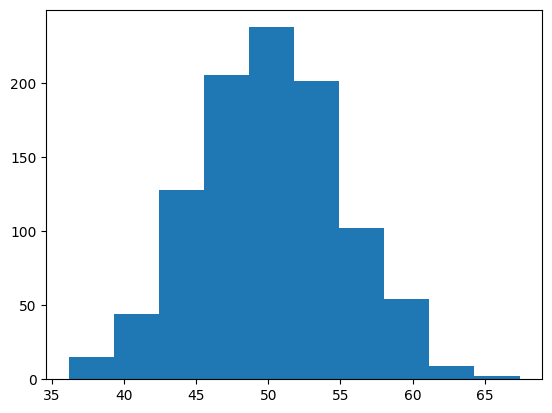

In [60]:
# lets plot a histogram 
plt.hist(sample,bins=10)

In [61]:
samplemean = sample.mean()

In [62]:
samplestd = sample.std()

In [63]:
#  fit the distribution with the above parameters , basically will use formula of probability density function of normal distribution 

# the mu and std parameter in the formula, i am putting sample mean and sample std there to create a probabilty density

from scipy.stats import norm 
dist = norm(samplemean,samplestd)

In [64]:
# we dont have the x, of the formula 

values = np.linspace(sample.min(),sample.max(),100)

In [65]:
print(sample.min())
print(sample.max())


36.167806763953706
67.40424774792795


In [66]:
probability_density = [dist.pdf(value) for value in values]
# for every x value a probability density will be created
# for every value in the {values variable}
# dist distribution ka pdf functin (formula) me i am putting each value of values

In [67]:
probability_density

[0.0016357124201788727,
 0.001948490880838841,
 0.0023117576781686625,
 0.002731736118387596,
 0.0032150496628562003,
 0.003768678862252558,
 0.004399902802523829,
 0.005116223856697707,
 0.005925274834167029,
 0.006834707999180213,
 0.007852065892156644,
 0.008984634426606047,
 0.010239279342307589,
 0.01162226775914037,
 0.013139077278325445,
 0.014794195797406947,
 0.01659091591681385,
 0.018531128490884185,
 0.0206151204841079,
 0.022841382802220086,
 0.025206434146032845,
 0.02770466715360048,
 0.030328223126844103,
 0.033066901460392595,
 0.035908109487851954,
 0.03883685782656201,
 0.04183580543766498,
 0.0448853575352937,
 0.04796381819833261,
 0.05104759809200405,
 0.054111476135439554,
 0.05712891230468753,
 0.060072407094271876,
 0.06291390153508392,
 0.06562521014487456,
 0.06817847783223016,
 0.07054665064460455,
 0.07270394939850497,
 0.0746263346991613,
 0.07629195168058972,
 0.07768154299435955,
 0.07877881915154056,
 0.07957077626698365,
 0.08004795254282439,
 0.080204

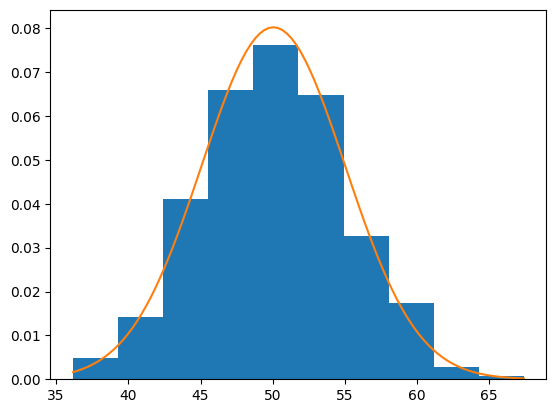

In [68]:
plt.hist(sample,bins=10,density=True) # density true karne se dono ka scale barabar hojaega 
plt.plot(values,probability_density)

In [85]:
import pandas as pd
wine = pd.read_csv('winequality-red.csv',delimiter=';')

(array([  8.,  27.,  90., 250., 485., 450., 185.,  74.,  19.,  11.]),
 array([0.99007 , 0.991432, 0.992794, 0.994156, 0.995518, 0.99688 ,
        0.998242, 0.999604, 1.000966, 1.002328, 1.00369 ]),
 <BarContainer object of 10 artists>)

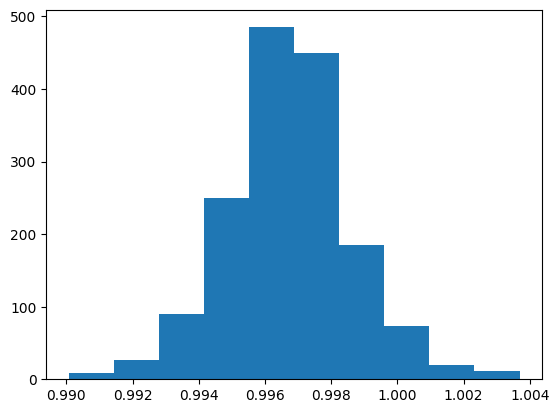

In [93]:
plt.hist(wine['density'])

We can see that the density column is normally distributed and hence we can apply Parametric Estimation

# Non Parametric Estimation
here we do not assume any distrubution since we do not see any distribution which is pre-defined or popular.
It doesnt require a the assumption of a specific distribution

And is computationally intensive

here u use points instead of parameter


### KDE Kernel Density Estimate 
KDE technique involves using a kernel function to smooth out the data and create a continuous estimate of the underlying density function

In [69]:
sample1 = normal(loc=20,scale=5,size=300)
sample2 = normal(loc=40,scale=5,size=700)

sample = np.hstack((sample1,sample2))

(array([ 3.,  1.,  3.,  8.,  6., 12., 17., 15., 12., 21., 17., 19., 26.,
        12., 24., 22., 23., 14., 13., 11.,  7., 12.,  5.,  7.,  9., 17.,
        18., 14., 25., 38., 34., 46., 56., 49., 53., 44., 52., 50., 42.,
        34., 35., 21.,  9., 12.,  7., 10.,  6.,  1.,  3.,  5.]),
 array([ 7.62203969,  8.55344685,  9.48485401, 10.41626117, 11.34766832,
        12.27907548, 13.21048264, 14.1418898 , 15.07329696, 16.00470411,
        16.93611127, 17.86751843, 18.79892559, 19.73033275, 20.6617399 ,
        21.59314706, 22.52455422, 23.45596138, 24.38736854, 25.31877569,
        26.25018285, 27.18159001, 28.11299717, 29.04440433, 29.97581149,
        30.90721864, 31.8386258 , 32.77003296, 33.70144012, 34.63284728,
        35.56425443, 36.49566159, 37.42706875, 38.35847591, 39.28988307,
        40.22129022, 41.15269738, 42.08410454, 43.0155117 , 43.94691886,
        44.87832601, 45.80973317, 46.74114033, 47.67254749, 48.60395465,
        49.53536181, 50.46676896, 51.39817612, 52.32958328,

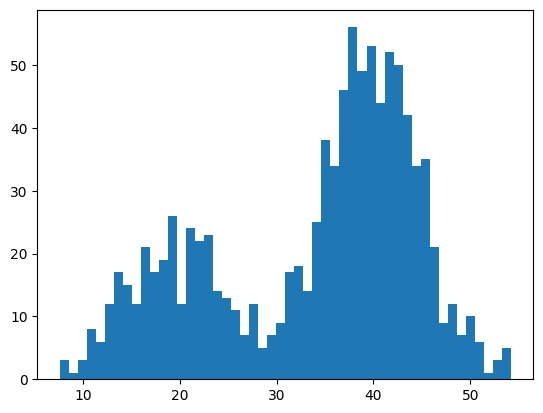

In [71]:
plt.hist(sample,bins=50)

we can this is not known distribution means will use KDE

In [73]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=3,kernel='gaussian')
# banwidth is basically the standard deviation of each of the kernek(normal distribution)

# convert the data to a 2D array
sample = sample.reshape((len(sample),1))

model.fit(sample)

KernelDensity(bandwidth=3)

calculated the overall y values by considering y values reached by each point in the y direction 

In [78]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values),1))

In [79]:
values

array([[ 7.62203969],
       [ 8.09244735],
       [ 8.562855  ],
       [ 9.03326266],
       [ 9.50367031],
       [ 9.97407797],
       [10.44448562],
       [10.91489328],
       [11.38530094],
       [11.85570859],
       [12.32611625],
       [12.7965239 ],
       [13.26693156],
       [13.73733921],
       [14.20774687],
       [14.67815453],
       [15.14856218],
       [15.61896984],
       [16.08937749],
       [16.55978515],
       [17.0301928 ],
       [17.50060046],
       [17.97100811],
       [18.44141577],
       [18.91182343],
       [19.38223108],
       [19.85263874],
       [20.32304639],
       [20.79345405],
       [21.2638617 ],
       [21.73426936],
       [22.20467701],
       [22.67508467],
       [23.14549233],
       [23.61589998],
       [24.08630764],
       [24.55671529],
       [25.02712295],
       [25.4975306 ],
       [25.96793826],
       [26.43834592],
       [26.90875357],
       [27.37916123],
       [27.84956888],
       [28.31997654],
       [28

In [81]:
probability_densities = model.score_samples(values) # y values 
probability_densities = np.exp(probability_densities)

score_samples(values) returns the log-density estimate
basically log values of y dega 

and to cut it off we use exp

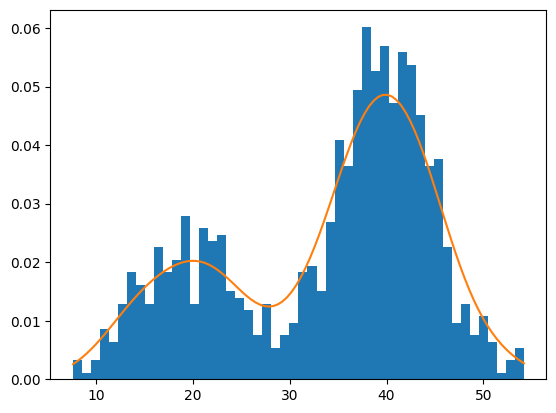

In [82]:
plt.hist(sample,bins=50,density=True)
plt.plot(values[:],probability_densities)

right value for bandwidth is determined on experimenting 
smaller value causes the distribution to peak and 
greater value smoothens the distribution

### Using Seaborn Library 

<Axes: ylabel='Density'>

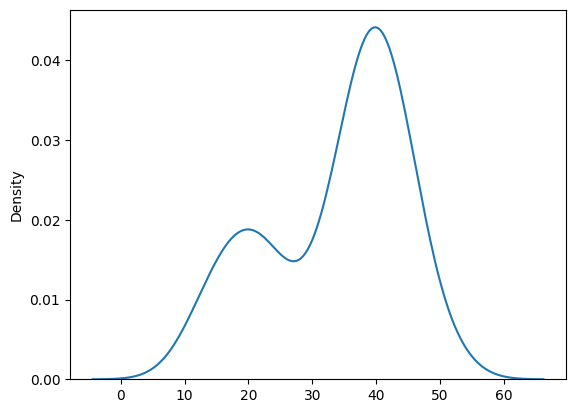

In [109]:
import seaborn as sns 
sns.kdeplot(sample.reshape(1000),bw_adjust=1.5) 